In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data       # This is a matrix with 150 rows and 4 columns
feature_names = iris.feature_names

# 2. Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
# We tell PCA to keep enough components to preserve 95% of the variation
pca = PCA(n_components = 0.95)
X_pca = pca.fit_transform(X_scaled)

# 4. Print results
print("Original number of features: ", X.shape[1])
print("Reduceed number of features after PCA: ", X_pca.shape[1])
print("Explained variance ratio of each component: ", pca.explained_variance_ratio_)
print("Total variance preserved: ", sum(pca.explained_variance_ratio_))

Original number of features:  4
Reduceed number of features after PCA:  2
Explained variance ratio of each component:  [0.72962445 0.22850762]
Total variance preserved:  0.9581320720000166


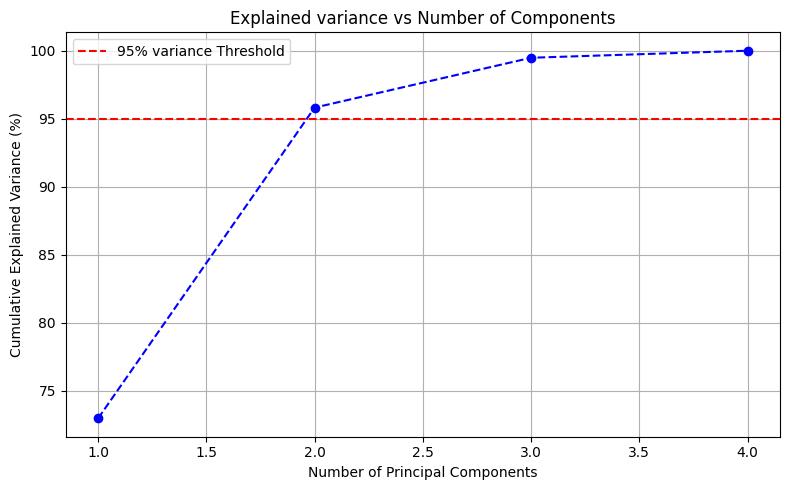

In [10]:
# 5. Plot cumulative explained variance

pca_full = PCA().fit(X_scaled)
cumsum = np.cumsum(pca_full.explained_variance_ratio_) * 100
components = np.arange(1, len(cumsum) + 1)

plt.figure(figsize = (8, 5))
plt.plot(components, cumsum, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained variance vs Number of Components')
plt.grid(True)
plt.axhline(y=95, color='r', linestyle='--', label='95% variance Threshold')
plt.legend()
plt.tight_layout()
plt.show()